***

# ANÁLISE DE DADOS DA EDUCAÇÃO - ENEM

***

**LÓGICA DE ANÁLISE**

**1. Importação de libs e dataset**

**2. Exploração do dataset:**
    - Tamanho do dataset
    - Valores faltantes
    - Colunas
    - Tipo de dados
    - Seleção das colunas importantes para as análises
    - etc.
    
**3. Análise da qualidade dos dados:**
    - Informaçoes incorretas (idade muito abaixo ou muito acima, dados não descritos no dicionário, etc)

**4. Análises estatísticas**
    Análise de informações gerais do dataset, sem focar no objeto de pesquisa, como:
    - Distribuicão por idade, sexo, anos de conclusão do ensino médio, etc.
    
    obs: Primeira análise para entender melhor o dataset e os dados que serão trabalhados. A familiaridade com o dataset auxiliará na formação de hipóteses no próximo passo, este com as análises focadas no objeto de estudo: relação das notas obtidas x renda declarada
    
**5. Formulação das hipóteses**

## IMPORTAÇÃO LIBS

In [1]:
import pandas               as pd
import seaborn              as sns
import matplotlib.pyplot    as plt
import numpy                as np

## IMPORTAÇÃO DATASET

In [2]:
df_raw = pd.read_csv('MICRODADOS_ENEM_2019.csv', encoding = "ISO-8859-1", sep = ';')

In [3]:
# Visualizando os estados
df_raw['SG_UF_RESIDENCIA'].unique()

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

In [4]:
# Criando a variável df para dados somente de SP
df = df_raw[(df_raw['SG_UF_RESIDENCIA'] == 'SP')]

In [5]:
# Visualizando o dataframe com dados aleatórios
df.sample(3)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3196656,190004201346,2019,3505302,Barra Bonita,35,SP,19,F,1,1,...,B,A,A,B,A,A,D,A,B,B
4137539,190005142253,2019,3505302,Barra Bonita,35,SP,16,F,1,1,...,B,A,B,D,A,A,D,B,C,B
1092467,190002097115,2019,3502101,Andradina,35,SP,18,F,1,1,...,B,A,B,B,A,A,C,A,B,B


## EXPLORAÇÃO DO DATASET

In [6]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 813772 linhas e 136 colunas


In [7]:
# Verificando as colunas existentes
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [8]:
# Verificando se somente SP está nos dataframe
df['SG_UF_RESIDENCIA'].value_counts()

SP    813772
Name: SG_UF_RESIDENCIA, dtype: int64

In [9]:
# Selecionando as colunas que serão importantes para análise (muitas colunas com valores nulos)

columns = ['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ANO_CONCLUIU', 'TP_ESCOLA','IN_TREINEIRO', 
          'CO_ESCOLA', 'TP_LOCALIZACAO_ESC', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL',
          'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'NU_NOTA_CN', 
           'TP_ST_CONCLUSAO','NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 
           'NU_NOTA_REDACAO',
           'Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013',
           'Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025']


In [10]:
# Sobrepondo a variavel df // Somente as colunas selecionadas para análise
df = df[columns]
df.sample(3)

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_LOCALIZACAO_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2325763,190003330427,17,M,1,1,0,2,0,35034400.0,1.0,...,B,B,B,D,A,A,D,B,C,B
3380323,190004385015,17,M,1,3,0,3,0,NaN,NaN,...,B,A,A,B,B,A,D,A,B,B
832324,190001836971,16,F,1,1,0,1,1,NaN,NaN,...,B,B,B,C,A,B,D,B,B,B


In [11]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 813772 linhas e 50 colunas


In [12]:
# Verificando valores nulos
df.isna().sum()

NU_INSCRICAO               0
NU_IDADE                   0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
IN_TREINEIRO               0
CO_ESCOLA             594480
TP_LOCALIZACAO_ESC    594480
IN_GESTANTE                0
IN_LACTANTE                0
IN_NOME_SOCIAL             0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NU_NOTA_CN            231167
TP_ST_CONCLUSAO            0
NU_NOTA_CH            193127
NU_NOTA_LC            193127
NU_NOTA_MT            231167
TP_LINGUA                  0
TP_STATUS_REDACAO     193127
NU_NOTA_REDACAO       193127
Q001                       0
Q002                       0
Q003                       0
Q004                       0
Q005                       0
Q006                       0
Q007                       0
Q008                       0
Q009                       0
Q010          

In [13]:
# Contando a quantidade de NaN no dataframe
valores_nulos_escola = np.count_nonzero(~np.isnan(df['CO_ESCOLA']))
valores_nulos_escola

219292

In [14]:
# Excluindo as colunas CO_ESCOLA e TP_LOCALIZACAO_ESC
df.drop(['CO_ESCOLA', 'TP_LOCALIZACAO_ESC'], axis = 1, inplace = True)

In [15]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 813772 linhas e 48 colunas


In [16]:
# Verificando o tipo de dado
df.dtypes

NU_INSCRICAO           int64
NU_IDADE               int64
TP_SEXO               object
TP_ESTADO_CIVIL        int64
TP_COR_RACA            int64
TP_ANO_CONCLUIU        int64
TP_ESCOLA              int64
IN_TREINEIRO           int64
IN_GESTANTE            int64
IN_LACTANTE            int64
IN_NOME_SOCIAL         int64
TP_PRESENCA_CN         int64
TP_PRESENCA_CH         int64
TP_PRESENCA_LC         int64
TP_PRESENCA_MT         int64
NU_NOTA_CN           float64
TP_ST_CONCLUSAO        int64
NU_NOTA_CH           float64
NU_NOTA_LC           float64
NU_NOTA_MT           float64
TP_LINGUA              int64
TP_STATUS_REDACAO    float64
NU_NOTA_REDACAO      float64
Q001                  object
Q002                  object
Q003                  object
Q004                  object
Q005                   int64
Q006                  object
Q007                  object
Q008                  object
Q009                  object
Q010                  object
Q011                  object
Q012          

## ANÁLISE - QUALIDADE DOS DADOS

### IDADE

In [17]:
# Analisando o aluno mais novo e o mais velho
print('O aluno mais novo tem {} anos e o mais velho {} anos'.format(df['NU_IDADE'].min(), df['NU_IDADE'].max() ))

O aluno mais novo tem 2 anos e o mais velho 91 anos


In [18]:
#  Visualizando os alunos por idade (verificado que há idades incorretas)
df['NU_IDADE'].value_counts().sort_index()

2     1
3     1
4     1
5     2
6     2
     ..
80    2
81    3
82    2
86    1
91    1
Name: NU_IDADE, Length: 80, dtype: int64

In [19]:
# Considerando que para fazer o ENEM precisa estar cursando o ensino médio, o que inicia entre 14 - 15 anos, 
# foi considerando alunos a partir de 13 anos (considerando alguns alunos mais "adiantados" quanto a idade)
# Alunos com idade menor a 13 anos terão a idade substituída para a mediana

# Quantidade de alunos com idade menor que 13
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

22

In [20]:
# Calculando a média e mediana dos alunos - Analisar se a substituicao faz sentido

print(df['NU_IDADE'].mean())
print(df['NU_IDADE'].median())

20.90507537737843
18.0


In [21]:
# Verificando os alunos com idade menor 13
df[['NU_INSCRICAO', 'NU_IDADE']][df['NU_IDADE'] < 13]

,NU_INSCRICAO,NU_IDADE
796441,190001801086,8
868999,190001873646,12
1521165,190002525820,3
2298099,190003302763,7
2298850,190003303514,4
2315222,190003319886,8
2631091,190003635760,8
3198273,190004202963,12
3221784,190004226475,7
3268517,190004273209,5


In [22]:
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

22

In [23]:
# Substituindo os valores
df.loc[df.NU_IDADE < 13, 'NU_IDADE'] = 18

In [24]:
# Consultando qt. candidatos com idade < 13
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

0

In [25]:
# Verificando se está correto I
df['NU_IDADE'].value_counts().sort_index()

13        29
14       355
15     11583
16     59316
17    219313
       ...  
80         2
81         3
82         2
86         1
91         1
Name: NU_IDADE, Length: 72, dtype: int64

### DEMAIS VARIÁVEIS

In [26]:
# Lista das colunas que serão analistadas

c = ['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'IN_GESTANTE',
     'IN_LACTANTE', 'IN_NOME_SOCIAL', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC', 'TP_PRESENCA_MT',
     'TP_LINGUA', 'Q001', 'Q002', 'Q003','Q004', 'Q005', 'Q006','Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
     'Q013', 'Q014', 'Q015','Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']   

In [27]:
# Função para analisar todas as colunas da variável c

def funcao_value_counts():
    for d in df[c]:
        print(df[d].value_counts().sort_index())
        
funcao_value_counts()

F    480164
M    333608
Name: TP_SEXO, dtype: int64
0     27689
1    721779
2     49323
3     14079
4       902
Name: TP_ESTADO_CIVIL, dtype: int64
0     12517
1    451336
2     82700
3    245222
4     18768
5      3229
Name: TP_COR_RACA, dtype: int64
0     402373
1     105724
2      68662
3      46169
4      33016
5      25129
6      19235
7      16340
8      12156
9      10516
10      9040
11      7442
12      6750
13     51220
Name: TP_ANO_CONCLUIU, dtype: int64
1    523349
2    230655
3     59768
Name: TP_ESCOLA, dtype: int64
0    719781
1     93991
Name: IN_TREINEIRO, dtype: int64
0    813654
1       118
Name: IN_GESTANTE, dtype: int64
0    813513
1       259
Name: IN_LACTANTE, dtype: int64
0    813681
1        91
Name: IN_NOME_SOCIAL, dtype: int64
0    230859
1    582605
2       308
Name: TP_PRESENCA_CN, dtype: int64
0    192396
1    620645
2       731
Name: TP_PRESENCA_CH, dtype: int64
0    192396
1    620645
2       731
Name: TP_PRESENCA_LC, dtype: int64
0    230859
1    582605

## ANÁLISES - ESTATÍSTICA DESCRITIVA

### CARACTERÍSTICAS DOS CANDIDATOS

        Para ter uma visão geral dos dados, será tirada a média de todas as notas somente
        dos alunos presentes, sem considerar a nota de redação.
        
        A nota de redação será analisada a parte

In [87]:
# Visualização geral das informaçoes
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,813772.0,1.900037e+11,1370714.76,1.900010e+11,1.900024e+11,1.900037e+11,1.900048e+11,1.900061e+11
NU_IDADE,813772.0,2.091000e+01,6.90,1.300000e+01,1.700000e+01,1.800000e+01,2.200000e+01,9.100000e+01
TP_ESTADO_CIVIL,813772.0,1.060000e+00,0.41,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,813772.0,1.770000e+00,1.00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
TP_ANO_CONCLUIU,813772.0,2.430000e+00,3.79,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.300000e+01
TP_ESCOLA,813772.0,1.430000e+00,0.63,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
IN_TREINEIRO,813772.0,1.200000e-01,0.32,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_GESTANTE,813772.0,0.000000e+00,0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_LACTANTE,813772.0,0.000000e+00,0.02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_NOME_SOCIAL,813772.0,0.000000e+00,0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [28]:
# Selecionando as colunas de presenca e nota, agrupando pela presenca e somando a nota
df[['TP_PRESENCA_CN', 'NU_NOTA_CN']].groupby('TP_PRESENCA_CN').sum() #quem é eliminado, zera a prova

,NU_NOTA_CN
TP_PRESENCA_CN,
0,0.000000e+00
1,2.895524e+08
2,0.000000e+00


### PRESENÇA NAS PROVAS

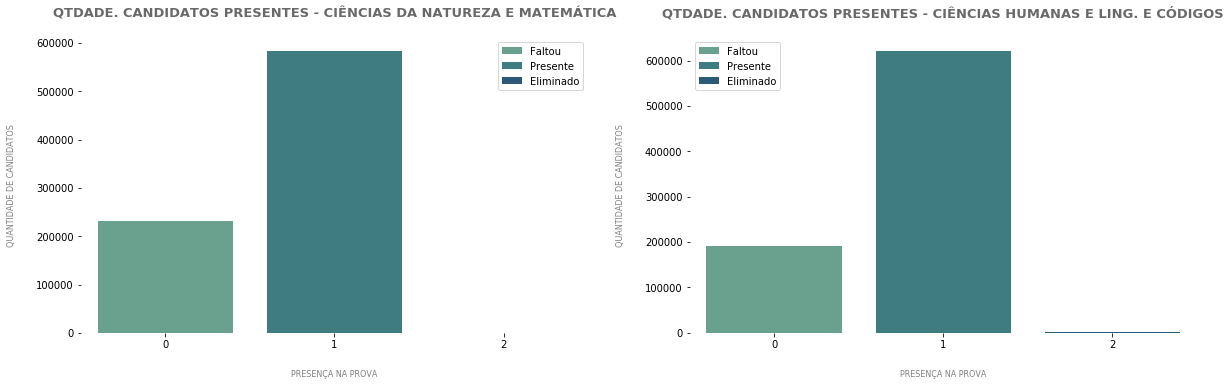

In [29]:
plt.figure(figsize=(20, 25))
#plt.subplots_adjust(hspace = 0.40)

ax2 = plt.subplot(4, 2, 2)
ax2 = sns.countplot(x = 'TP_PRESENCA_CH',data = df,
                    palette = 'crest', hue = 'TP_PRESENCA_CH',
                   dodge = False)

ax2 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS HUMANAS E LING. E CÓDIGOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax2 = sns.despine(bottom = True, left=True)
ax2 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])
ax2 = plt.legend(loc=2, labels=['Faltou', 'Presente', 'Eliminado'])


#####

ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'TP_PRESENCA_CN',data = df,
                    palette = 'crest', hue = 'TP_PRESENCA_CN',
                   dodge = False)

ax1 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS DA NATUREZA E MATEMÁTICA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])


###################




    
    
**OBS**:

    1 - As provas ciencias da natureza e matematica são aplcadas no mesmo dia
    2 - As provas ciencias humanas e linguagens e codigos foram aplicadas no mesmo dia

    Conforme consultado no G1, as provas do ENEM 2019 foram aplicadas na ordem:
    3 - Linguagens e codigos, ciencias humanas e redacao
    4 - C. Natureza e matematica
    
    
**Algumas Conclusões** 

    1 - Os candidatos tendem a faltar no primeiro dia de prova
    2 - Os candidatos costuam ser eliminados com maior frequencia no segundo dia de prova

### IDADE x SEXO

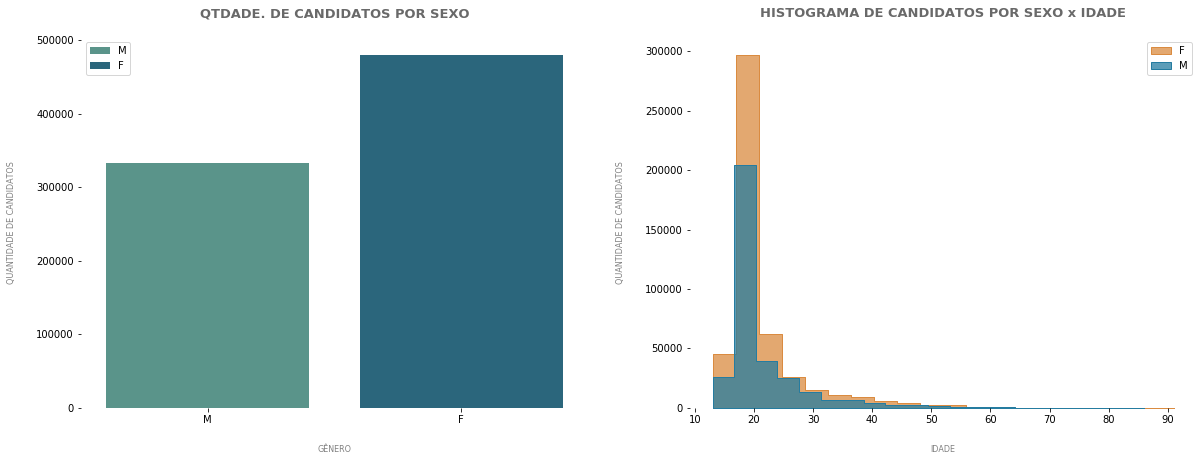

In [30]:
plt.figure(figsize=(20, 15))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'TP_SEXO', data = df,
                    palette = 'crest', hue = 'TP_SEXO', dodge = False
                   )
s1 = plt.title('QTDADE. DE CANDIDATOS POR SEXO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('GÊNERO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=2, labels=['M', 'F'])


##############

s2 = plt.subplot(2, 2, 2)

sns.histplot(df[df['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(df[df['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS POR SEXO x IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


    
**Algumas Conclusões** 

    1 - Há maior quantidade de mulheres realizando as provas
    2 - Há maior concentração de mulheres entre 20 - 25 anos quando comparado aos homens
    3 - APARENTEMENTE, há maior concentração de mulheres até 55 anos realizando a prova. Após essa idade,
    há maior quantidade de homens

### ENSINO MÉDIO

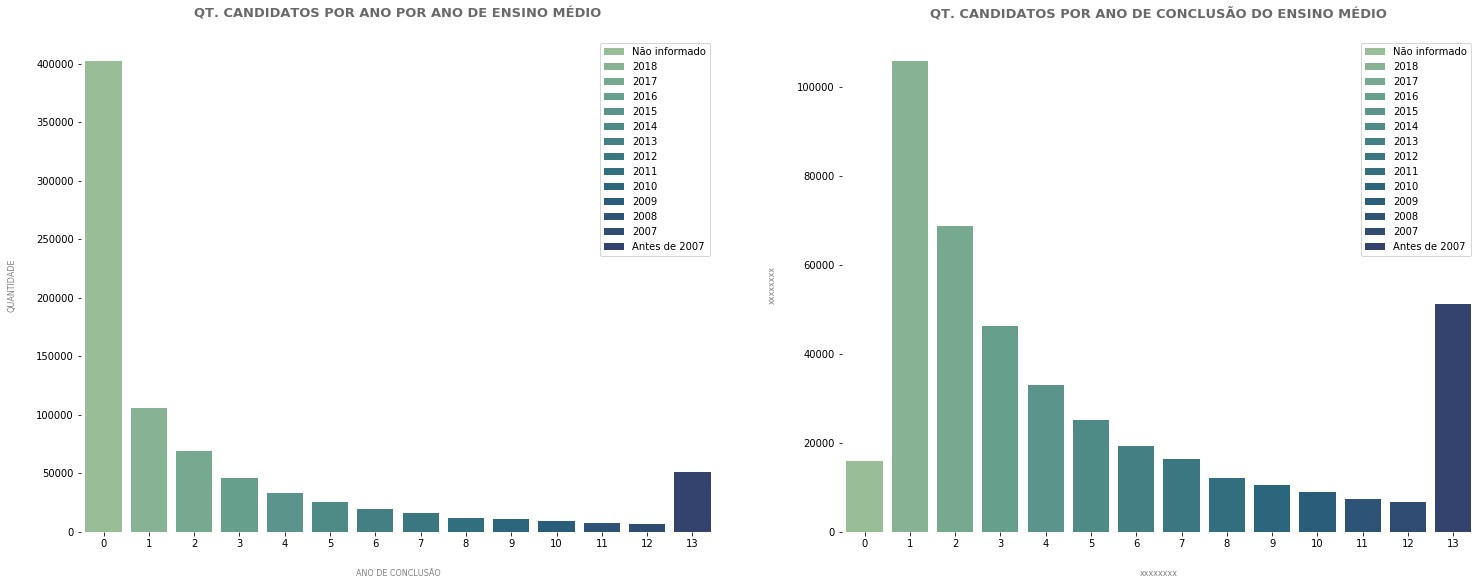

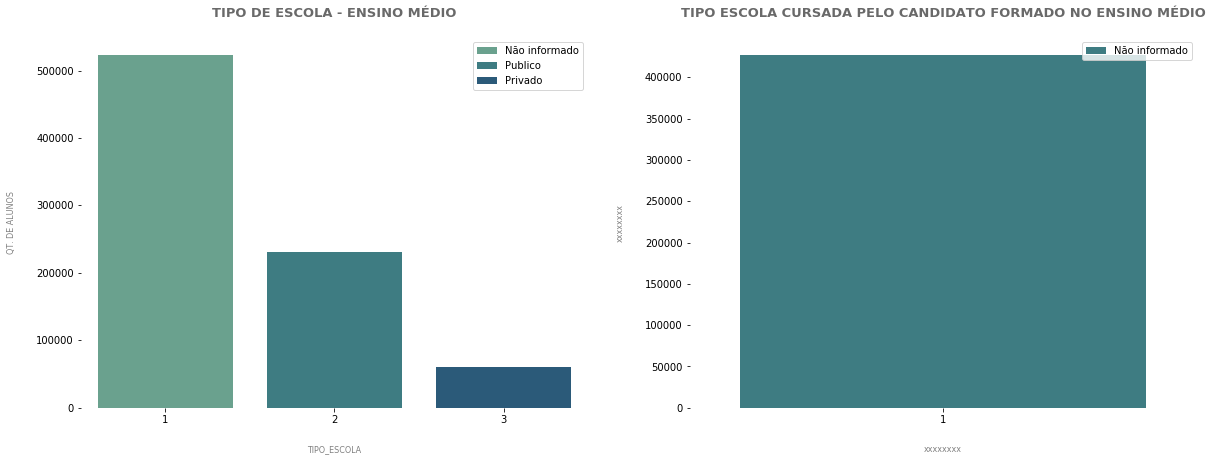

In [59]:
plt.figure(figsize=(25, 20))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'TP_ANO_CONCLUIU', data = df,
                    palette = 'crest', hue = 'TP_ANO_CONCLUIU', dodge = False
                   )
s1 = plt.title('QT. CANDIDATOS POR ANO POR ANO DE ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('ANO DE CONCLUSÃO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=1, labels=['Não informado','2018','2017','2016','2015','2014','2013',
                               '2012','2011','2010','2009','2008','2007','Antes de 2007'])

##################################################

concluido = df[df['TP_ST_CONCLUSAO'] == 1]
concluido


## Somente candidatos que concluíram o ensino médio

s2 = plt.subplot(2, 2, 2)

s2 = sns.countplot(x = 'TP_ANO_CONCLUIU', data = concluido,
                    palette = 'crest', hue = 'TP_ANO_CONCLUIU', dodge = False)


s2 = plt.title('QT. CANDIDATOS POR ANO DE CONCLUSÃO DO ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('xxxxxxxx', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('xxxxxxxx', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=1, labels=['Não informado','2018','2017','2016','2015','2014','2013',
                               '2012','2011','2010','2009','2008','2007','Antes de 2007'])


##################################################

plt.figure(figsize=(20, 15))
s3 = plt.subplot(2, 2, 3)

s3 = sns.countplot(x = 'TP_ESCOLA', data = df,
                    palette = 'crest', hue = 'TP_ESCOLA', dodge = False
                   )
s3 = plt.title('TIPO DE ESCOLA - ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('TIPO_ESCOLA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QT. DE ALUNOS', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Não informado', 'Publico', 'Privado'])


##################################################

concluido = df[df['TP_ST_CONCLUSAO'] == 1]
concluido


## Somente candidatos que concluíram o ensino médio

s4 = plt.subplot(2, 2, 4)

s4 = sns.countplot(x = 'TP_ESCOLA', data = concluido,
                    palette = 'crest', hue = 'TP_ESCOLA', dodge = False)


s4 = plt.title('TIPO ESCOLA CURSADA PELO CANDIDATO FORMADO NO ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s4 = sns.despine(bottom = True, left=True)
s4 = plt.xlabel('xxxxxxxx', color = 'grey', labelpad = 20, fontsize = 8)
s4 = plt.ylabel('xxxxxxxx', color = 'grey', labelpad = 20, fontsize = 8)
plt.legend(labels=['Não informado', 'Publico', 'Privado'])

s4 = s4

    
**Algumas Conclusões** 

    VER 
    VER
    VER
    VER
    VER

### ESTADO CIVIL

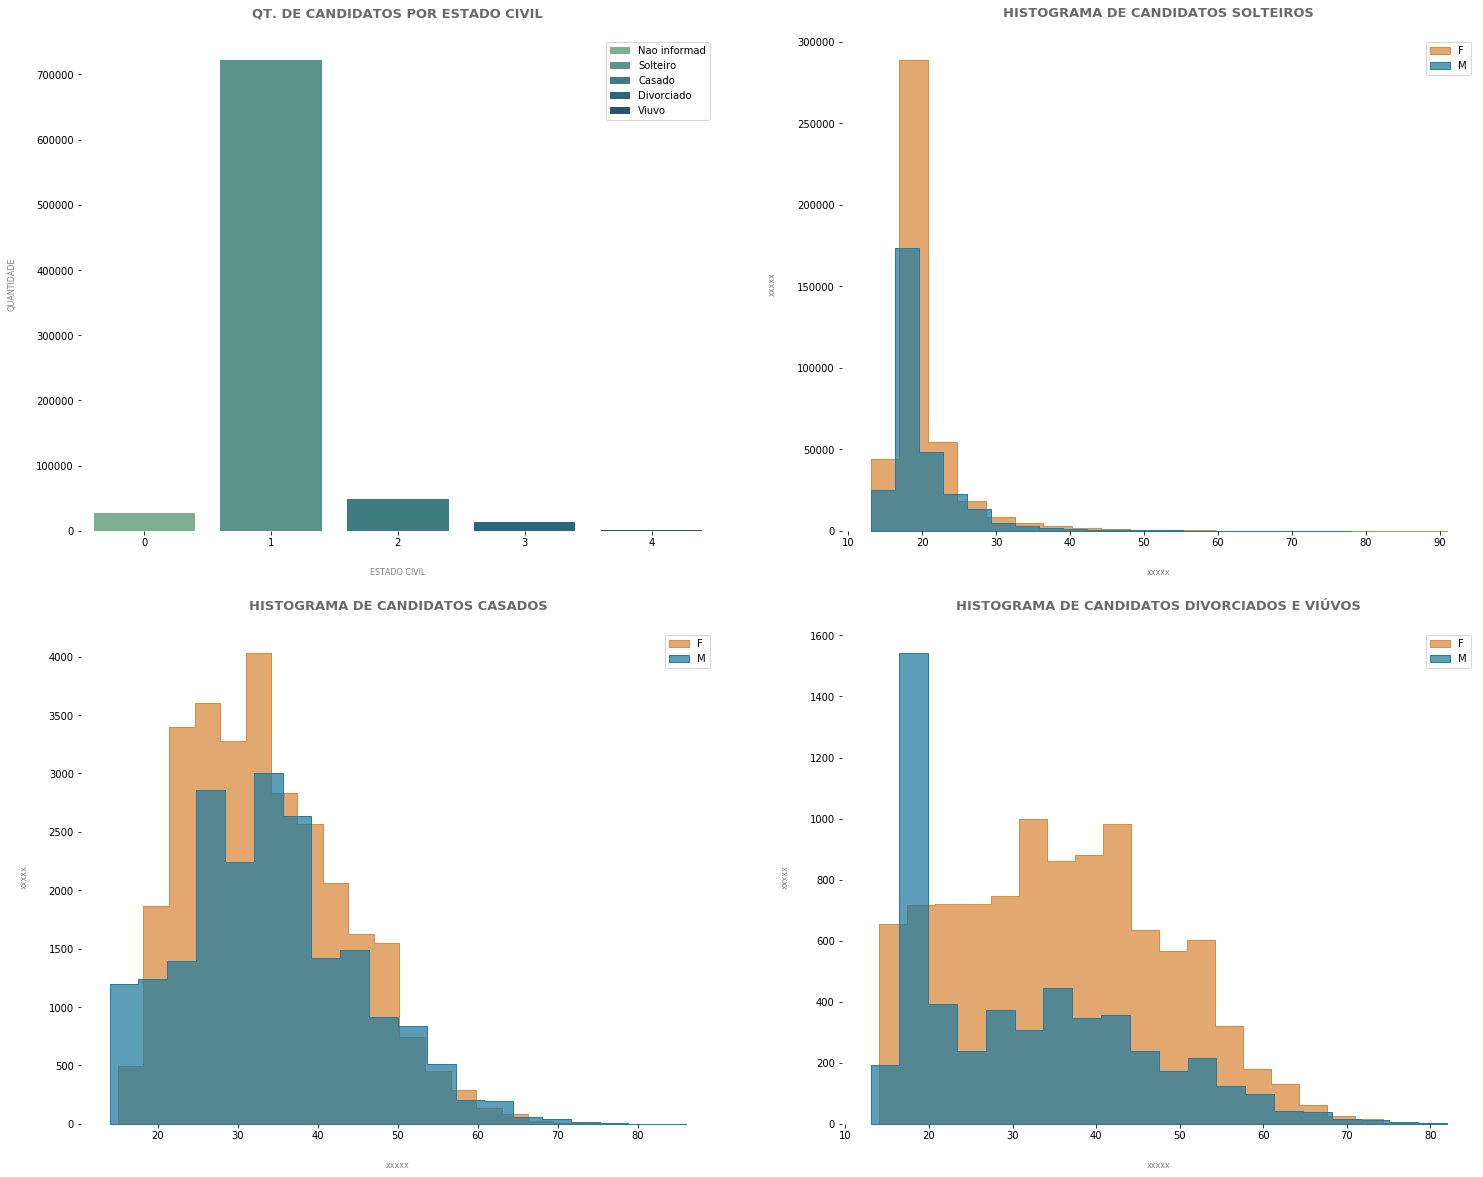

In [84]:
plt.figure(figsize=(25, 20))

s2 = plt.subplot(2, 2, 1)
s3 = sns.countplot(x = 'TP_ESTADO_CIVIL', data = df,
                    palette = 'crest', hue = 'TP_ESTADO_CIVIL', dodge = False)


s3 = plt.title('QT. DE CANDIDATOS POR ESTADO CIVIL',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('ESTADO CIVIL', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Nao informad', 'Solteiro', 'Casado', 'Divorciado', 'Viuvo'])


##########

estado_civil = df[df['TP_ESTADO_CIVIL'] == 1]

s2 = plt.subplot(2,2, 2)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS SOLTEIROS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##########

estado_civil = df[df['TP_ESTADO_CIVIL'] == 2]

s2 = plt.subplot(2, 2, 3)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS CASADOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##########

estado_civil = df[(df['TP_ESTADO_CIVIL'] == 3) | (df['TP_ESTADO_CIVIL'] == 4)]

s2 = plt.subplot(2, 2, 4)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DIVORCIADOS E VIÚVOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

    
**Algumas Conclusões** 

    1 - A maior parte dos candidatos são solteiros
    2 - Candidatos casados se concentram mais após os ~22 anos
    3 - Candidatos divorciados e viúvos estão mais "espalhados" em relação a idade

###  RAÇA

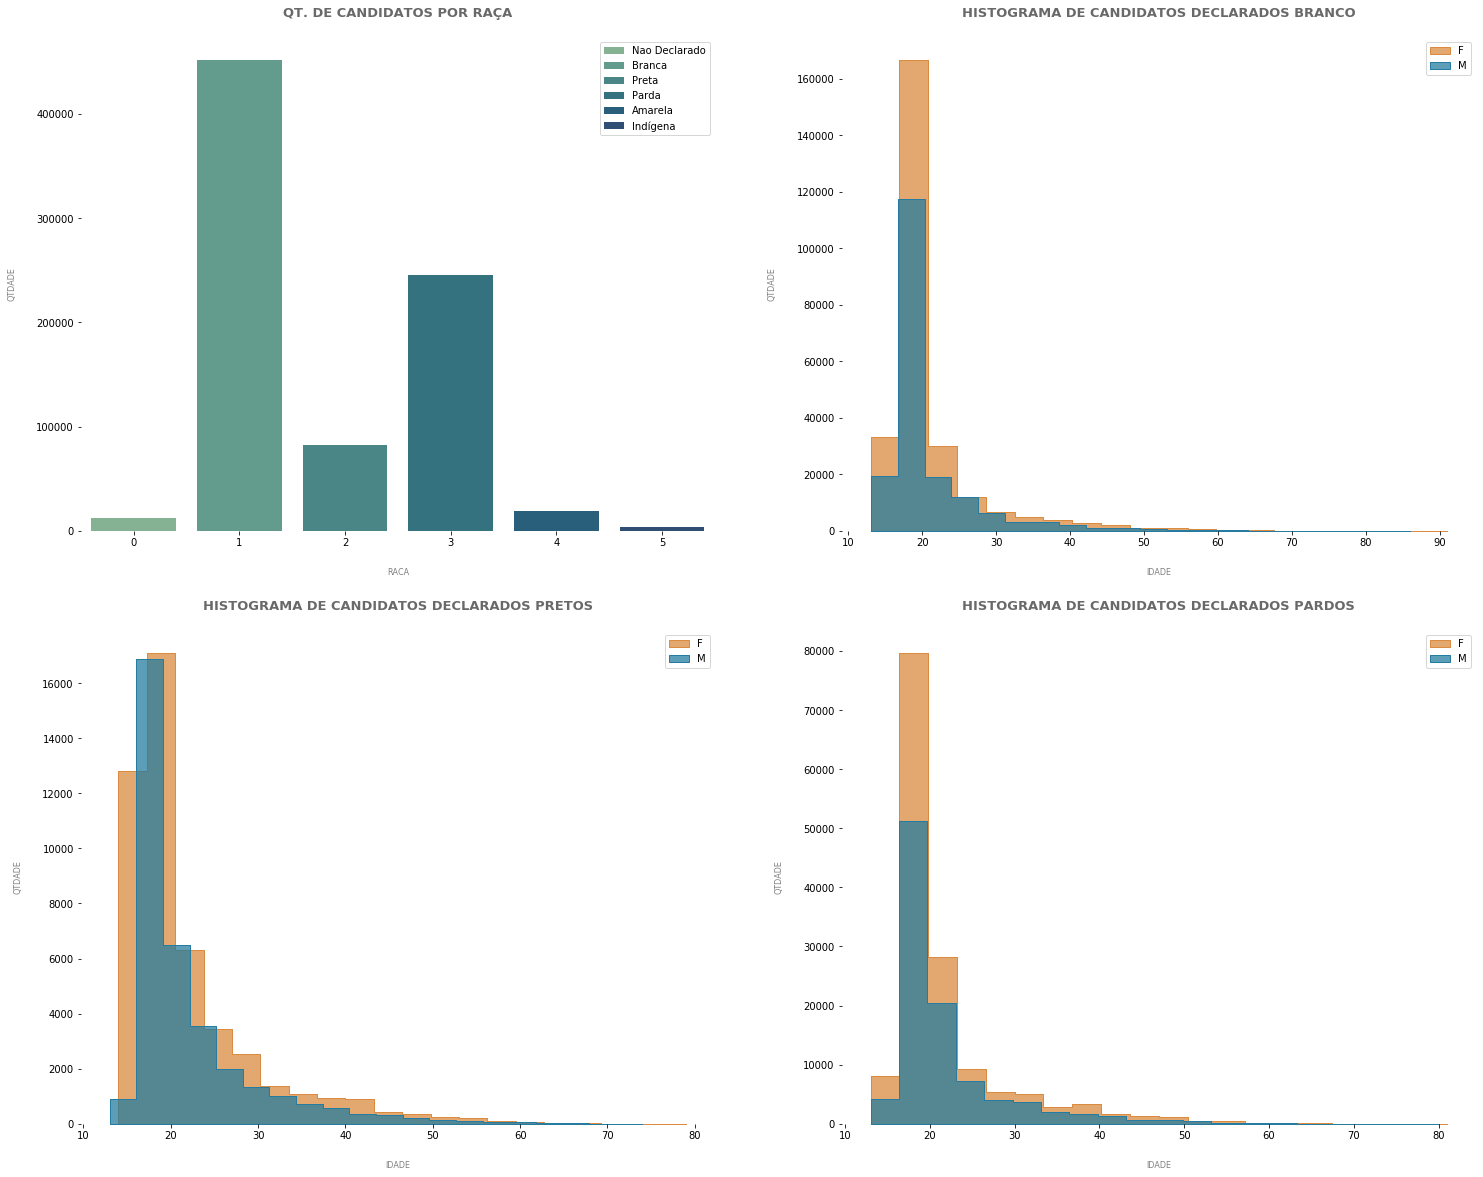

In [93]:
plt.figure(figsize=(25, 20))

s2 = plt.subplot(2, 2, 1)
s3 = sns.countplot(x = 'TP_COR_RACA', data = df,
                    palette = 'crest', hue = 'TP_COR_RACA', dodge = False)


s3 = plt.title('QT. DE CANDIDATOS POR RAÇA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('RACA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Nao Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])

##########

raca = df[df['TP_COR_RACA'] == 1]

s2 = plt.subplot(2, 2, 2)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS BRANCO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##############

raca = df[df['TP_COR_RACA'] == 2]

s2 = plt.subplot(2, 2, 3)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS PRETOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

##############

raca = df[df['TP_COR_RACA'] == 3]

s2 = plt.subplot(2, 2, 4)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS PARDOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

    
**Algumas Conclusões** 

    1 - A maior parte ds candidatos se autodeclaram brancos, seguidos por pardos, negros, amarelos e indígenas
    2 - A distribuição entre os sexos é bastante parecida, com exeção dos declarados pretos, com maior concentração de mulheres mais jovens
    3 - A distribuição dos candidatos declarados pretos também está levemente mais distribuída quando comparado aos declarados brancos e pardos
    4 - Os declarados brancos estão concentrados nas idades mais jovens

### NOTAS

In [ ]:
Variáveis referente a nota obtida
        - NU_NOTA_CN
        - NU_NOTA_CH
        - NU_NOTA_LC
        - NU_NOTA_MT
        - NU_NOTA_REDACAO

## FORMULAÇÃO DAS HIPÓTESES

A seção a seguir tem como objetivo responder algumas hipóteses formuladas. 
Foi elaborado o Mind Map para suportar a formulação das questões objetos desta análise.

<img width="900px" height="1000px" src= 'MindMap.png'/>